In [2]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
import re
from matplotlib.colors import ListedColormap
from turbo_colormap import *

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

from scipy.integrate import odeint
from scipy.optimize import fsolve
import random

import seaborn as sns

#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

c:\Users\Pok Him\Desktop\MouseBrainModelling\tvb\datatypes\surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [ ]:
reader = csv.reader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'), delimiter=',', quotechar='|')

ParamsDict = {}
for row in reader:
    #print(', '.join(row))
    print(row[0])

In [3]:
reader = csv.DictReader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'))

result = {}
for row in reader:
    print(', '.join(row))

FileNotFoundError: [Errno 2] No such file or directory: 'do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'

In [4]:
dictobj

NameError: name 'dictobj' is not defined

In [5]:
# Empty dict
ParamsDict = { }
ParamsDict["name"] = "MouseCortex"
ParamsDict["G"] = np.array([1.9]) 
ParamsDict["REMOVE"] = [7]
ParamsDict["BINARY"]=True

# Ye dunno why having the closing square bracket messes up glob glob. 
Sim_run_files = glob.glob("do-not-track/LCycle_G[0.4*_.csv")
print(Sim_run_files)

# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(Sim_run_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0

SCM = con.weights

# current_calculator(bold_data,ParamsDict["G"],con.weights)

[]


IndexError: list index out of range

In [6]:
# External Current Calculator:
J_e = []
#len(bold_time)
for j in np.arange(1000):       
    t_0 = []
    # Specific column (or time point)
    for i in np.arange(SCM.shape[0]): 
        # Sum over all external currents (May need to do SCM[:,i] instead)  
        t  = sum(bold_data[:,j]*SCM[:,i])
        # To obtain currents to particular region
        t_0.append(t)
    J_e.append(t_0)

J_e = np.array(J_e)
print("Max",np.max(J_e))
print("Median",np.median(J_e))
print("Min",np.min(J_e))

NameError: name 'SCM' is not defined

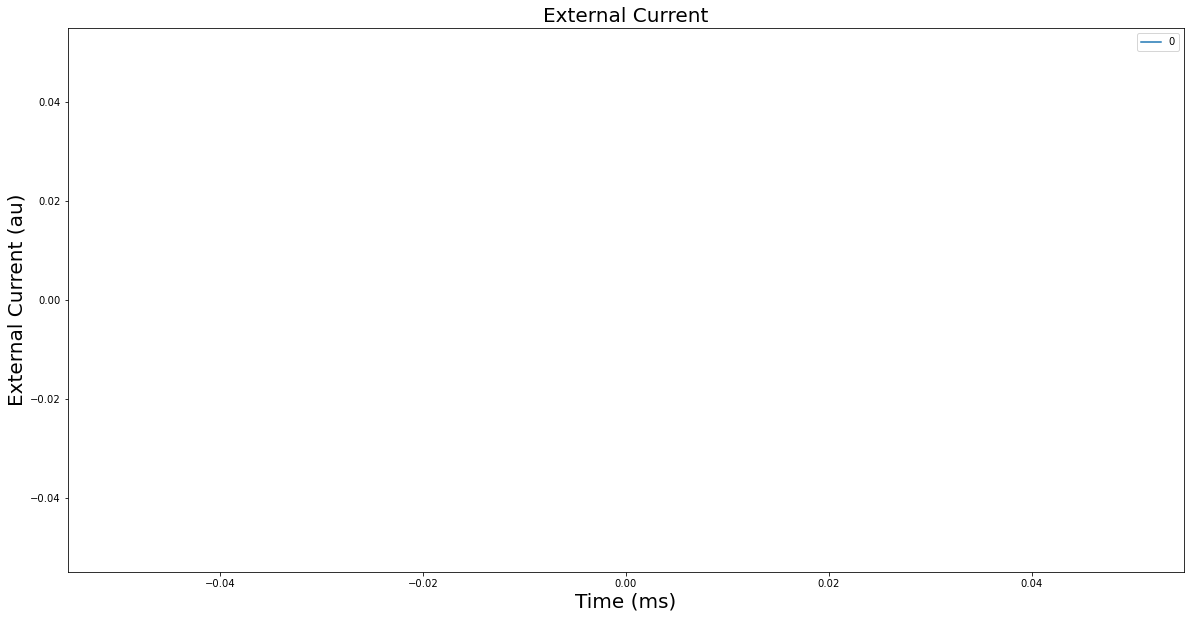

In [7]:
plt.plot(J_e)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('External Current (au)', fontsize=20)
plt.title('External Current', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

In [8]:
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "3Regions"

# Monitors or not?  (Aka BOLD or not?)
ParamsDict["BOLD"] = False

# Change to Binary Connectome? (If True, will change the connectome into binary)
ParamsDict["BINARY"] = True

# Snip is the the number of elements you wish to snip at the start to remove the initial condition effects.
ParamsDict["Snip"] = 10
# Note, if BOLD = False, Snip gets multiplied by 1000. 
if ParamsDict["BOLD"] == False:
    ParamsDict["Snip"] = 100 * ParamsDict["Snip"]

# Set the Random State/Seed for the Stochastic Integrator:
ParamsDict["RandState"] = 118

# Set Simulation Length:
ParamsDict["Simul_length"] = 1.2e3

# Set Linear Coupling Constant:
ParamsDict["G"] = np.array([0.47])

# Set integrator time step dt.
ParamsDict["dt"] = 0.1

# Remove ith indexed region (7 corresponds to Frontal Pole Cerebral Cortex) - Give it a list if removing multiple regions.  Empty list removes nothing. 
# ParamsDict["REMOVE"] = [7]

# Set Additive Noise strength
ParamsDict["noise"] = np.array([0.000013])  

# Params Dict tag (extra note tags for the name - Example to denote what's being changed/looped.)
ParamsDict["tag"] = "Single"

# Set Wilson Cowan Model Parameters
ParamsDict["MODEL_c_ee"] = np.array([11.0])
ParamsDict["MODEL_c_ei"] = np.array([10.0])
ParamsDict["MODEL_c_ie"] = np.array([10.0])
ParamsDict["MODEL_c_ii"] = np.array([1.0])

# Define the model. 
ParamsDict["MODEL"] = models.WilsonCowan(c_ee=ParamsDict["MODEL_c_ee"],c_ei=ParamsDict["MODEL_c_ei"],c_ie=ParamsDict["MODEL_c_ie"] ,c_ii=ParamsDict["MODEL_c_ii"],
                                        a_e=numpy.array([1.0]),a_i=numpy.array([1.0]),b_e=numpy.array([1.3]),b_i=numpy.array([2.8]),tau_e=numpy.array([10.0]),
                                        tau_i=numpy.array([65.0])) 


# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file("C:\\Users\\Pok Him\\Desktop\\MouseBrainModelling\\Connectomes\\" + ParamsDict["name"] + ".zip")

# Mouse Allen Connectivity (from within TVB)
# con = connectivity.Connectivity.from_file("../mouse/allen_2mm/Connectivity.h5")

# Change to Connectome to Binary if desired:
if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0
'''
# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

# Number of regions
con.number_of_regions = con.weights.shape[0]
'''

WARNING  File 'hemispheres' not found in ZIP.


'\n# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)\ncon.centres = np.delete(con.centres,ParamsDict["REMOVE"])\ncon.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)\ncon.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)\ncon.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)\ncon.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)\n\n# Number of regions\ncon.number_of_regions = con.weights.shape[0]\n'

In [9]:
# Set the parameter of the resting state simulation

if ParamsDict["BOLD"] == True:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.HeunStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            monitors=(monitors.Bold(period=2e3),
                                      monitors.TemporalAverage(period=1e3)),
                            simulation_length=ParamsDict["Simul_length"],
                            #initial_conditions=[1.8,1.8,1.8,1.8,1.8]
                            ).configure()
    # Run the resting state simulation
    (bold_time, bold_data), _ = sim.run()

    # Display the simulated bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated BOLD timeseries', fontsize=20)
    plt.legend(('0','1','2','3','4'))

# No Monitors 
else:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.EulerStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            simulation_length=ParamsDict["Simul_length"],
                            initial_conditions=0.5 + numpy.zeros((con.number_of_regions*con.number_of_regions,2,con.number_of_regions,1)), # numpy.ones((n * n, 1, n, 1)),
                            ).configure()
    # Run the resting state simulation
    awer = sim.run()
    bold_time = awer[0][0]
    bold_data = awer[0][1]

    # Display the simulated non-bold timeseries
    # Display the simulated non-bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated non-BOLD timeseries', fontsize=20)
    plt.legend(np.arange(38))
    plt.grid()

ValueError: Incorrect history sample shape (2, 0, 1), expected (2, 3, 1)

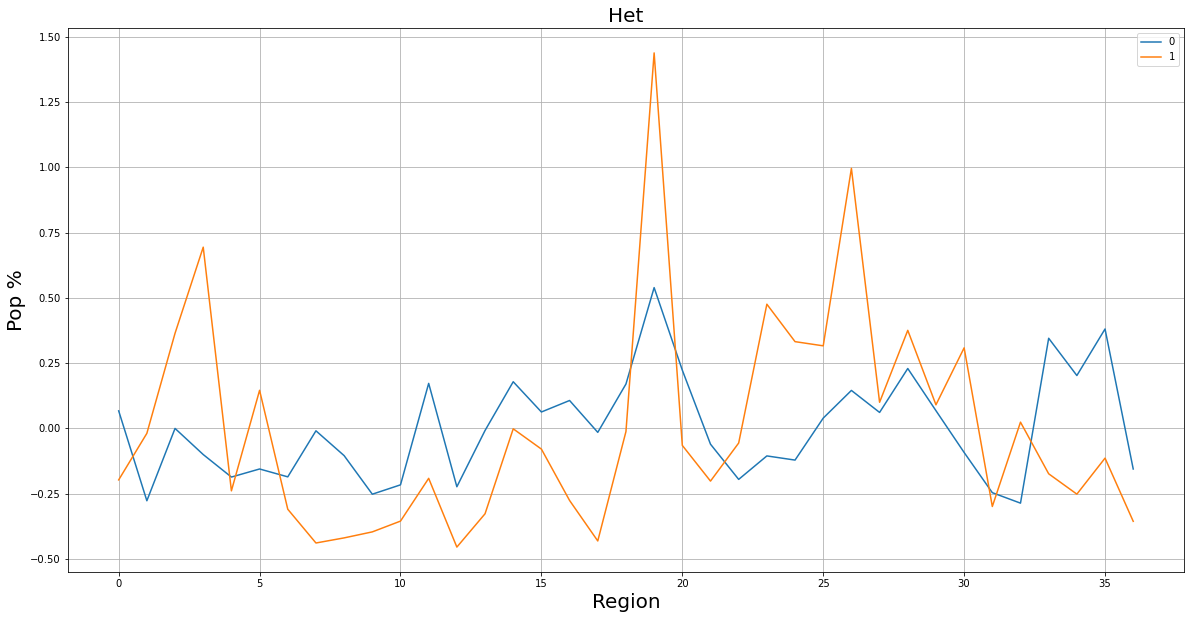

In [33]:
df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7) -0.28 to 0.54
E_normalised = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7) -0.45 to 1.44
I_normalised = (I_pop-I_mean)/I_mean

# Graph it: 
plt.plot(E_normalised)
plt.plot(I_normalised)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Pop %', fontsize=20)
plt.title('Het', fontsize=20)
plt.grid()
plt.legend(np.arange(2))
plt.show()



In [44]:
print(np.max(E_normalised))
print(np.min(E_normalised))
print(np.max(I_normalised))
print(np.min(I_normalised))

numpy.linspace(start=-0.28,stop=0.54,num=37)

0.5392677506855525
-0.28616841357716255
1.4381600972597013
-0.4544597496377836


array([-0.28      , -0.25722222, -0.23444444, -0.21166667, -0.18888889,
       -0.16611111, -0.14333333, -0.12055556, -0.09777778, -0.075     ,
       -0.05222222, -0.02944444, -0.00666667,  0.01611111,  0.03888889,
        0.06166667,  0.08444444,  0.10722222,  0.13      ,  0.15277778,
        0.17555556,  0.19833333,  0.22111111,  0.24388889,  0.26666667,
        0.28944444,  0.31222222,  0.335     ,  0.35777778,  0.38055556,
        0.40333333,  0.42611111,  0.44888889,  0.47166667,  0.49444444,
        0.51722222,  0.54      ])

In [27]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("D:\Simulations\\20_8_8\*Scorr*.csv")
# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.05]_MouseCortex_Scorr_20200808-203629_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.15]_MouseCortex_Scorr_20200808-203607_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.1]_MouseCortex_Scorr_20200808-203623_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.25]_MouseCortex_Scorr_20200808-203601_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.2]_MouseCortex_Scorr_20200808-203636_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.35]_MouseCortex_Scorr_20200808-203636_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.3]_MouseCortex_Scorr_20200808-203616_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.45]_MouseCortex_Scorr_20200808-203632_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.4]_MouseCortex_Scorr_20200808-203617_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.55]_MouseCortex_Scorr_20200808-203606_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.5]_MouseCortex_Scorr_20200808-203616_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.65]_M

In [20]:
Grad_files = glob.glob("D:\Simulations\\20_8_8\Grad*Scorr*.csv")
Rot3_files = glob.glob("D:\Simulations\\20_8_8\Rot3*Scorr*.csv")
Shuffle_files = glob.glob("D:\Simulations\\20_8_8\Shuffle*Scorr*.csv")

Scorr_files = glob.glob("do-not-track/Old/5_8_20/LCycle_*Scorr*.csv")
Files_S0 = Scorr_files[0::6]
Files_S1 = Scorr_files[1::6]
S0 = SCFC_sort(Files_S0)
S1 = SCFC_sort(Files_S1)
S2 = SCFC_sort(Shuffle_files)
S3 = SCFC_sort(Grad_files)
S4 = SCFC_sort(Rot3_files)

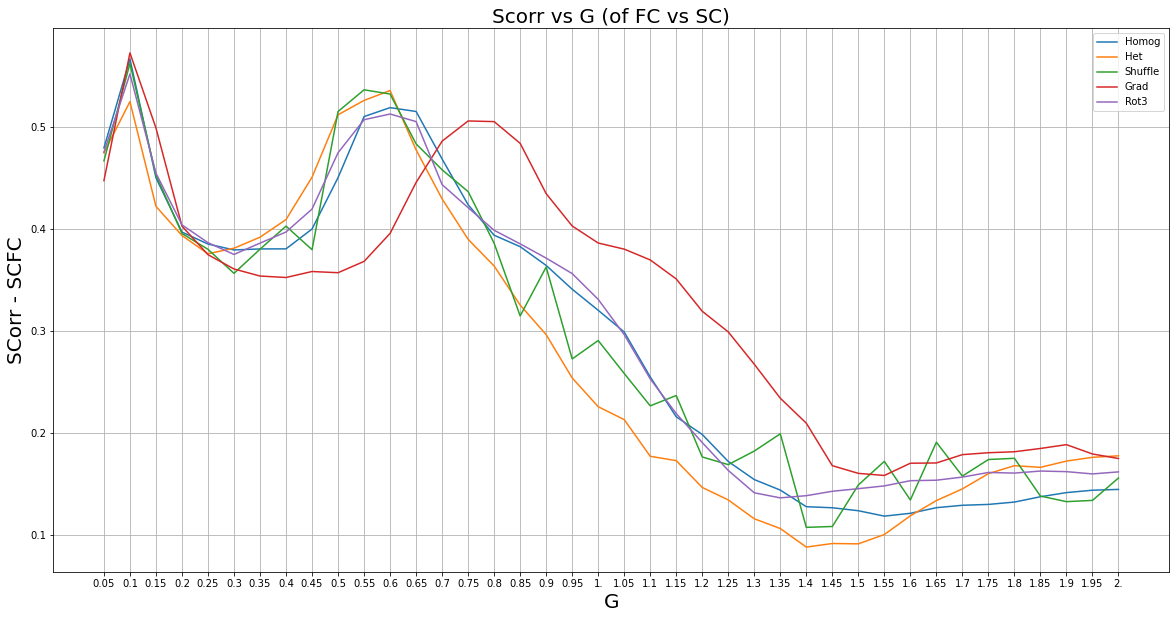

In [23]:
# Graph it: 
plt.plot(S0[0],S0[1])
plt.plot(S1[0],S1[1])
plt.plot(S2[0],S2[1])
plt.plot(S3[0],S3[1])
plt.plot(S4[0],S4[1])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - SCFC', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)
plt.grid()
plt.legend(("Homog","Het","Shuffle","Grad","Rot3"))
plt.show()

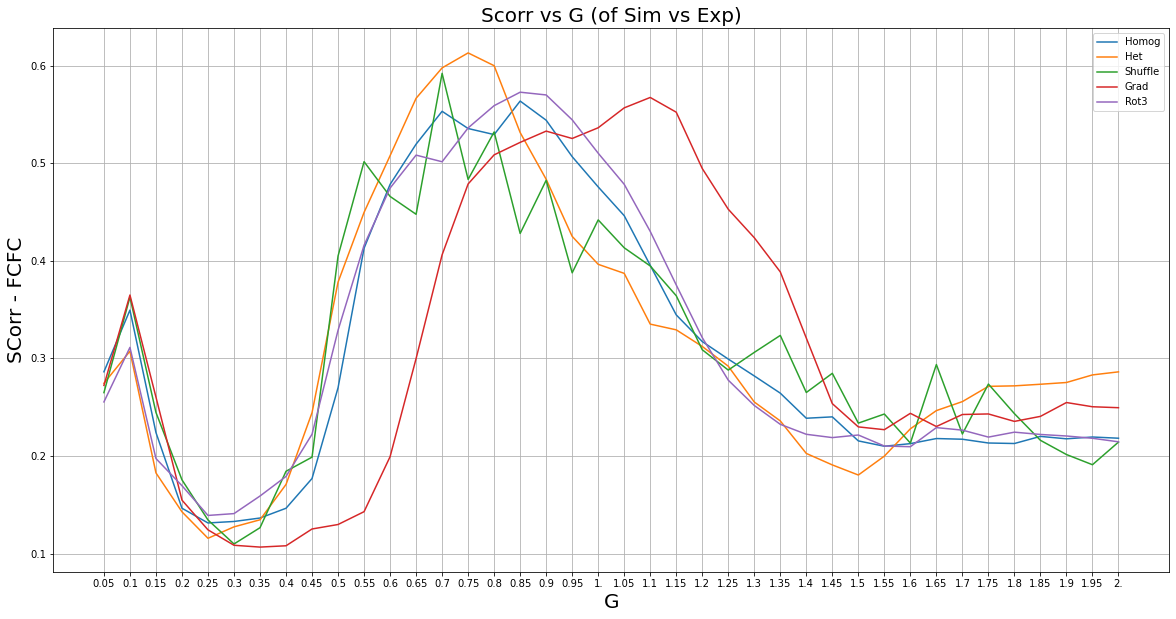

In [25]:
# Graph it: 
plt.plot(S0[0],S0[2])
plt.plot(S1[0],S1[2])
plt.plot(S2[0],S2[2])
plt.plot(S3[0],S3[2])
plt.plot(S4[0],S4[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.legend(("Homog","Het","Shuffle","Grad","Rot3"))
plt.show()

In [ ]:
# FCFC Shuffle
ParamsDict["ExportSim"] = False 
ParamsDict["Simul_length"] = 1.2e4

# First we must shuffle it randomly. 
# Let's Pause by X seconds to make sure the random stuff is working (based on  sys time after all)
time.sleep(i)

df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7) -0.28 to 0.54
E_norm = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7) -0.45 to 1.44
I_norm = (I_pop-I_mean)/I_mean

# Shuffled:
perm = numpy.random.permutation(len(E_norm))
E_normalised = E_norm[perm]
I_normalised = I_norm[perm]

# Heterogeneous Coupling Constants (array)
ParamsDict["MODEL_c_ie"] = h_ie * (1 + sigma * E_normalised) 
ParamsDict["MODEL_c_ee"] = h_ee  * (1 + sigma * E_normalised) 
ParamsDict["MODEL_c_ii"] = h_ii  * (1 + sigma * I_normalised) 
ParamsDict["MODEL_c_ei"] = h_ei  * (1 + sigma * I_normalised) 

Best_Score = 0 
Best_G = 0
Best_Sigma = 0  

# Sweep across the range of Sigma values:
for I in np.arange(6):

    ParamsDict["sigma"] =I*0.2
    sigma = ParamsDict["sigma"] 
    
    # Sweep across the range of G values
    for J in np.arange(41):
        ParamsDict["G"] = J * 0.05

        ParamsDict["MODEL"] = models.WilsonCowan(c_ee=ParamsDict["MODEL_c_ee"],c_ei=ParamsDict["MODEL_c_ei"],c_ie=ParamsDict["MODEL_c_ie"] ,c_ii=ParamsDict["MODEL_c_ii"],
                                            a_e=numpy.array([1.0]),a_i=numpy.array([1.0]),b_e=numpy.array([1.5]),b_i=numpy.array([2.8]),tau_e=numpy.array([10.0]),
                                            tau_i=numpy.array([65.0])) 
        Score = Simul_Pipeline(ParamsDict=ParamsDict)[2]

        # If the score is the best score, store it. 
        if Score > Best_Score:
            Best_Score = Score
            Best_G = ParamsDict["G"]
            Best_Sigma = ParamsDict["Sigma"]         

# Now export the information:
time_now = time.strftime("%Y%m%d-%H%M%S")
np.savetxt("do-not-track/" + str(i) + "_" + ParamsDict["name"] + "_Best_" + time_now + "_.csv", [Best_Score,Best_G,Best_Sigma], delimiter="\t")
np.savetxt("do-not-track/" + str(i) + "_" + ParamsDict["name"] + "_EIHet_" + time_now + "_.csv", [E_normalised,I_normalised], delimiter="\t")

In [3]:
df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7) -0.28 to 0.54
E_norm = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7) -0.45 to 1.44
I_norm = (I_pop-I_mean)/I_mean

# Shuffled:
perm = numpy.random.permutation(len(E_norm))
E_normalised = E_norm[perm]
I_normalised = I_norm[perm]

In [2]:
SCorr_Files = glob.glob(r"D:\Simulations\2020_09_10\*Scorr*.csv")

In [3]:
SCorr_Files

5413_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.2_MouseCortex_Scorr_20200908-030809_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.2_MouseCortex_Scorr_20200908-195510_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.4_MouseCortex_Scorr_20200908-040832_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.4_MouseCortex_Scorr_20200908-205646_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.6000000000000001_MouseCortex_Scorr_20200908-050841_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.6000000000000001_MouseCortex_Scorr_20200908-215817_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.8_MouseCortex_Scorr_20200908-060841_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.8_MouseCortex_Scorr_20200908-225938_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i1.0_MouseCortex_Scorr_20200908-070850_.csv',
 'D:\\Simulat

In [4]:

SCFC = []
FCFC = []
G_value = []

# Loop to populate the empty array with the numbers from the Scorr csv files:

for item in SCorr_Files:
    a = np.genfromtxt(item)
    SCFC.append(a[0])
    FCFC.append(a[2])
    G_value.append(par_extract(item))

print(FCFC)

[0.43404205233290694, 0.41040335349496565, 0.39105423918806703, 0.40053289754228766, 0.42757887465533645, 0.4180854299531803, 0.4467490091572787, 0.43167388059678763, 0.39962983352867365, 0.39586784539045256, 0.41860636436506404, 0.4089435672328437, 0.45314300784986505, 0.43679361294764124, 0.42012866763123224, 0.41961894484580514, 0.41704242371803335, 0.39456018790036, 0.4932078362363221, 0.4591842465274172, 0.4372594641512815, 0.40288993889562036, 0.4209774608733025, 0.41428095137556203, 0.45746825835202704, 0.44781805398865293, 0.4404871126720729, 0.42217751112251234, 0.4010153630764378, 0.3786358598794487, 0.4717349717744258, 0.4562372948863914, 0.4224269698111725, 0.3819149356433347, 0.3810946589294258, 0.3920305037483291, 0.20693300982103952, 0.1850464119697924, 0.21064807973984967, 0.29395156110219633, 0.4483534091519573, 0.37411574643485007, 0.2436333753464662, 0.1852097117464434, 0.16757061420519168, 0.1827520907296809, 0.332754797159437, 0.338989680124376, 0.28104519168986936

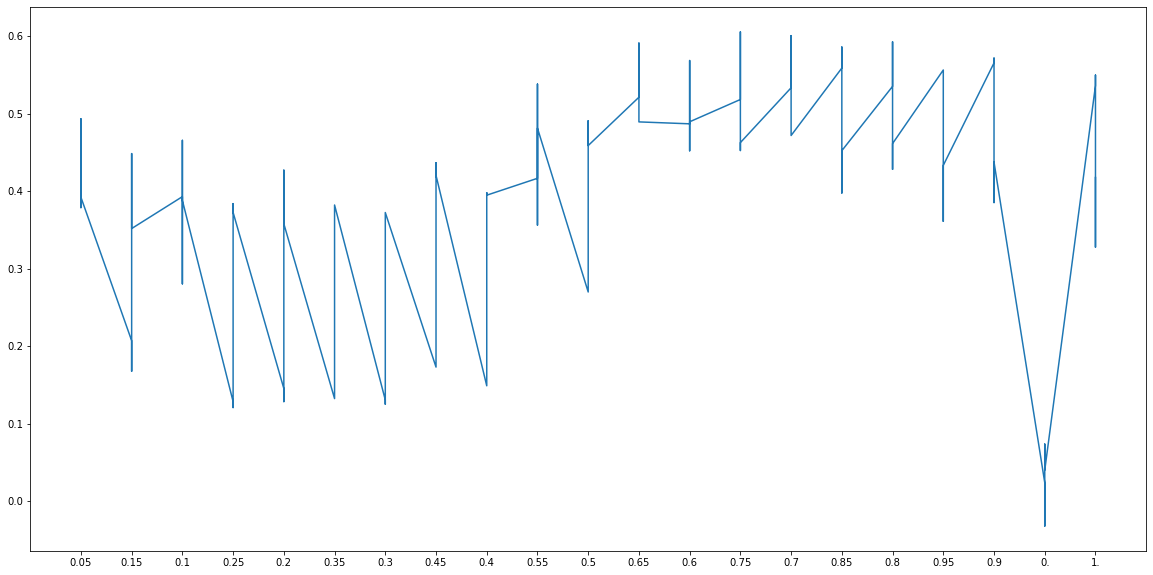

In [8]:
plt.plot(G_value,FCFC)
#plt.xticks(np.arange(20))

## Numerical Solution of Stationary States

In [2]:
def sig(v):
    # Sigmoid function
    return 1/(1 + np.exp(-v))

# Fixed pt - J_i=0,b_e=3,b_i=3.7,a_e=1,a_i=1,w_ee=12,w_ei=15,w_ie=10,w_ii=8,
# LCycle - J_i=0,b_e=2,b_i=2.8,a_e=1,a_i=1,w_ee=11,w_ei=10,w_ie=10,w_ii=1,
# LCycleH - J_i=0,b_e=3,b_i=4,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=15,w_ii=3,
# Jump - J_i=0,b_e=5,b_i=3.7,a_e=1.3,a_i=2,w_ee=11,w_ei=10,w_ie=10,w_ii=1,



def func(z,J_e,J_i=0,b_e=5,b_i=3.7,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=10,w_ii=3,):
    # Initialise the function array.
    f = np.zeros(2)

    E = z[0]
    I = z[1]

    # Wilson Cowan Equations setting derivative = 0 
    f[0] = -E + (1 - E)*sig(a_e*(w_ee*E - w_ei*I - b_e + J_e))
    f[1] = -I + (1 - I)*sig(a_i*(w_ie*E - w_ii*I - b_i + J_i))

    return f

In [3]:
J_e = np.arange(0,5,0.1)
array = []

for i in J_e:
    
    array_2 = []

    sol = fsolve(func,[0.5,0.2],i,maxfev=100000)
    # func(root) should be almost 0.0.
    if all(np.isclose(func(sol,i), [0.0, 0.0])):
        # Get only E value
        array_2.append(sol[0])
    else:
        array_2.append(np.nan)    

    sol = fsolve(func,[0,0],i,maxfev=100000)
    # func(root) should be almost 0.0.
    if all(np.isclose(func(sol,i), [0.0, 0.0])):
        # Get only E value
        array_2.append(sol[0])
    else:
        array_2.append(np.nan)    

    sol = fsolve(func,[0.45,0.15],i,maxfev=100000)
    # func(root) should be almost 0.0.
    if all(np.isclose(func(sol,i), [0.0, 0.0])):
        # Get only E value
        array_2.append(sol[0])
    else:
        array_2.append(np.nan)    

    # Then put the array at the end of the run
    array.append(array_2)

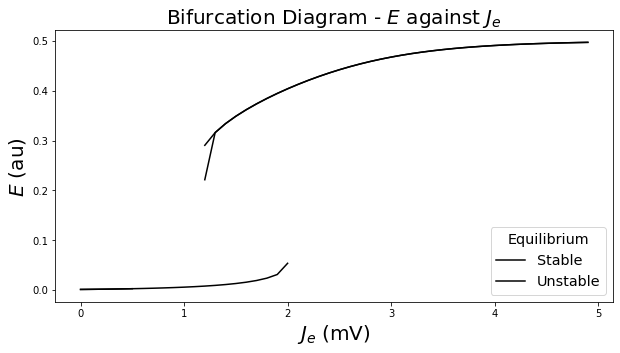

In [4]:
plt.plot(J_e,array,'k',)
plt.legend(('Stable','Unstable'),title="Equilibrium",loc="lower right",title_fontsize="x-large",fontsize="x-large")

#plt.vlines(x=0,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(0,0.5,"$B_e$=5",fontsize=14)

#plt.vlines(x=1,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(1,0.5,"$B_e$=4",fontsize=14)

#plt.vlines(x=2,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(2,0.5,"$B_e$=3",fontsize=14)

#plt.vlines(x=3,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(3,0.5,"$B_e$=0",fontsize=14)

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au) ", fontsize=20)
plt.title("Bifurcation Diagram - $E$ against $J_e$", fontsize=20)
plt.show()


In [5]:
J_e = np.arange(0,5,0.05)
array = []
array_3 = []

for i in J_e:
    
    array_2 = []

    for j in np.arange(100):
        # Brute force try random ones:
        sol = fsolve(func,[random.random()/2,random.random()/2],i,maxfev=100000)
        # func(root) should be almost 0.0.
        if all(np.isclose(func(sol,i), [0.0, 0.0])):
            # Get only E value
            array_2.append(sol[0])
        else:
            array_2.append(np.nan)    

    # Then add the median, max, and min to the end of array

    if i < 2.35:
        MAX = np.nan
        MIN = np.nanmin(array_2)
        #MID = np.median(array_2)

    if i > 1.1:
        MAX = np.nanmax(array_2)

    if i > 2:
        MIN= np.nan

    '''
    for k in array_2:
        if (np.isclose(k,MAX)):
            #Do nothing
            dummy = 1
        else:
            MID = k

    '''
    array.append([MAX,MIN])
    array_3.append(array_2)

array = np.array(array)
array_3 = np.array(array_3)

In [6]:
super_threshold_indices = (array_3 < 0.07) 
array_3[super_threshold_indices] = np.nan
super_threshold_indices = (array_3 > 0.28)
array_3[super_threshold_indices] = np.nan

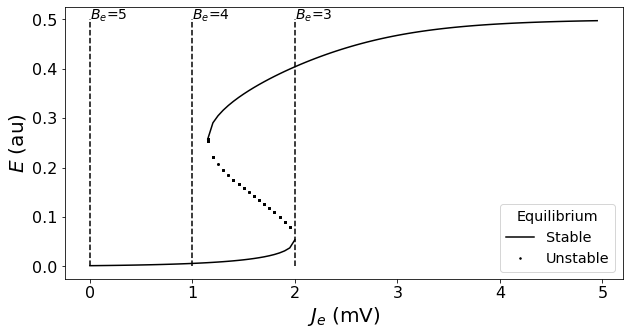

In [8]:
plt.plot(J_e,array[:,0],'k',)
plt.plot(J_e,array_3,'k.',markersize=3)
plt.plot(J_e,array[:,1],'k')
plt.legend(('Stable','Unstable'),title="Equilibrium",loc="lower right",title_fontsize="x-large",fontsize="x-large")

plt.vlines(x=0,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(0,0.5,"$B_e$=5",fontsize=14)

plt.vlines(x=1,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(1,0.5,"$B_e$=4",fontsize=14)

plt.vlines(x=2,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(2,0.5,"$B_e$=3",fontsize=14)

#plt.vlines(x=3,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(3,0.5,"$B_e$=0",fontsize=14)

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au)", fontsize=20)
plt.xticks(fontsize=16, )
plt.yticks(fontsize=16, )

plt.savefig("do-not-track\\Fig.pdf",bbox_inches='tight')
plt.show()


## Bifurcation Diagram Generation

In [9]:
# Define the Wilson Cowan Equations

def sig(v):
    # Sigmoid function
    return 1/(1 + np.exp(-v))

# Fixed pt - J_i=0,b_e=3,b_i=3.7,a_e=1,a_i=1,w_ee=12,w_ei=15,w_ie=10,w_ii=8,
# LCycle - J_i=0,b_e=2,b_i=2.8,a_e=1,a_i=1,w_ee=11,w_ei=10,w_ie=10,w_ii=1,
# LCycleH - J_i=0,b_e=3,b_i=4,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=15,w_ii=3,

def func(z,t,J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,_tau_i):
    # Initialise the function array.
    f = np.zeros(2)

    E = z[0]
    I = z[1]

    # Wilson Cowan Equations setting derivative = 0 
    f[0] = (-E + (1 - E)*sig(a_e*(w_ee*E - w_ei*I - b_e + J_e)))/tau_e
    f[1] = (-I + (1 - I)*sig(a_i*(w_ie*E - w_ii*I - b_i + J_i)))/tau_i

    return f

In [12]:
The_max = []
The_min = []

# Parameters
'''
# LCycle
w_ee=11
w_ei=10
w_ie=10
w_ii=1
b_e=3
b_i=2.8
tau_e=10
tau_i=65
a_e=1
a_i=1
#J_e=3.5
J_i=0

'''
# Fixed Pt
w_ee=12
w_ei=15
w_ie=10
w_ii=8
b_e=5
b_i=4
tau_e=10
tau_i=10
a_e=1
a_i=1
#J_e=3.5
J_i=0

'''
# Hysteresis
w_ee=16
w_ei=12
w_ie=10
w_ii=3
b_e=5
#b_e = 2.5
b_i=3.7
tau_e=10
tau_i=10
a_e=1.3
a_i=2
#J_e=3.5
J_i=0
'''
'''
# Jump 
w_ee=11
w_ei=10
w_ie=10
w_ii=1
b_e=5
#b_e = 2.5
b_i=3.7
tau_e=10
tau_i=10
a_e=1.3
a_i=2
#J_e=3.5
J_i=0
'''
# Integrator Settings
length = 10000 
dt = 0.1
t = np.arange(0, length, dt)
J = np.arange(0,5,0.05)

for J_e in J:
    # Solve it! Note that the additional "args" supplied to "odeint" must be in a tuple; "(a,)".
    solut = odeint(func, [0.5, 0.5], t, args=(J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,tau_i) )

    # Obtain the max and min of the last 1/10 (tenth) elements
    eqbm_max = max(solut[-int(length/dt/10):,0])
    eqbm_min = min(solut[-int(length/dt/10):,0])

    The_max.append(eqbm_max)
    The_min.append(eqbm_min)

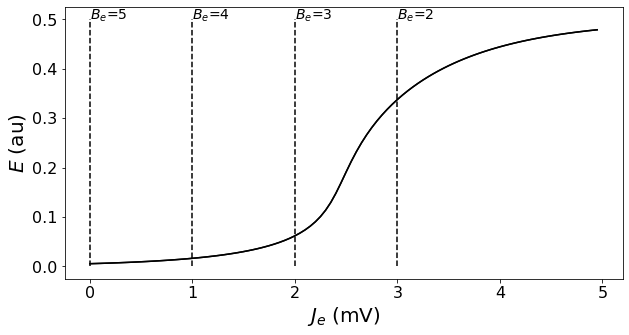

In [13]:
plt.plot(J,The_max,color='k')
plt.plot(J,The_min,color='k')

plt.vlines(x=0,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(0,0.5,"$B_e$=5",fontsize=14)

plt.vlines(x=1,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(1,0.5,"$B_e$=4",fontsize=14)

plt.vlines(x=2,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(2,0.5,"$B_e$=3",fontsize=14)

plt.vlines(x=3,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(3,0.5,"$B_e$=2",fontsize=14)

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au)", fontsize=20)
plt.xticks(fontsize=16, )
plt.yticks(fontsize=16, )

plt.savefig("do-not-track\\Fig.pdf",bbox_inches='tight')
plt.show()


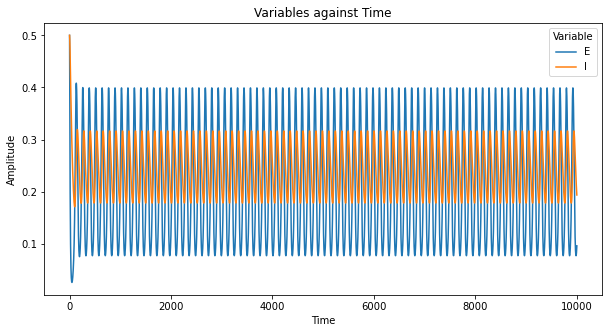

In [5]:
# Check a certain J_e
J_e=2

# Solve it! Note that the additional "args" supplied to "odeint" must be in a tuple; "(a,)".
solut = odeint(func, [0.5, 0.5], t, args=(J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,tau_i) )

plt.plot(t, solut[:])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Variables against Time")
plt.legend(("E","I"),title="Variable")
plt.show()

## Benchmarking Results vs Literature

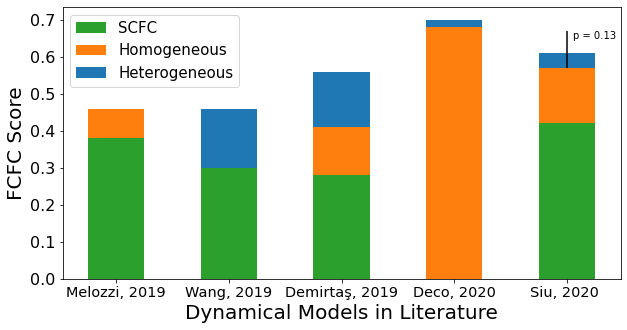

In [35]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
N = 5

SCFC = (0.38, 0.30, 0.28, np.nan, 0.42)
Homog = (0.46 , np.nan, 0.41, 0.68, 0.57)
Het = (np.nan, 0.46, 0.56, 0.70, 0.61)
error = (np.nan,np.nan,np.nan,np.nan,0.04),(np.nan,np.nan,np.nan,np.nan,0.06)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p3 = plt.bar(ind, Het, width, yerr=error)
p2 = plt.bar(ind, Homog, width,)
p1 = plt.bar(ind, SCFC, width)

plt.ylabel('FCFC Score', fontsize=20)
#plt.title('Benchmarking against Literature', fontsize=20)
plt.xticks(ind, ('Melozzi, 2019', 'Wang, 2019', 'Demirtaş, 2019', 'Deco, 2020', 'Siu, 2020 ',), fontsize=14.5) # rotation=45, ha="right"
plt.yticks(fontsize=16)
plt.xlabel("Dynamical Models in Literature", fontsize=20)
plt.legend((p1[0], p2[0],p3[0]), ('SCFC','Homogeneous','Heterogeneous'),loc=2, prop={'size': 15})
plt.annotate("p = 0.15",xy=(4.05,0.65), fontsize=10)
plt.savefig("do-not-track\\Benchmarking.pdf",bbox_inches='tight')

plt.show()

## Error ranges for the simulations

In [4]:
# First Import the Scorrs
# Tag is of form: Hysteresis_i" + str(i) + "Length_e4"

#Regime = "LCycle"
# Import All Files

SCorr_files = glob.glob(r"D:\Simulations\\2020_11_17\\" + "*Scorr*.csv") 
#SCorr_files = glob.glob(r"D:\Simulations\\2020_11_20\\" + "*Scorr*.csv") 

print(SCorr_files)


eCut_i20Length_e6_MouseCortex_Scorr_20201117-075949_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i21Length_e4_MouseCortex_Scorr_20201117-035020_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i21Length_e5_MouseCortex_Scorr_20201117-041454_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i21Length_e6_MouseCortex_Scorr_20201117-082213_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i22Length_e4_MouseCortex_Scorr_20201117-035413_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i22Length_e5_MouseCortex_Scorr_20201117-041847_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i22Length_e6_MouseCortex_Scorr_20201117-082452_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i23Length_e4_MouseCortex_Scorr_20201117-035629_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i23Length_e5_MouseCortex_Scorr_20201117-042106_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i23Length_e6_MouseCortex_Scorr_20201117-082805_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i24Length_e4_MouseCortex_Scorr_2020

In [5]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("2020_11_17.(.*)_i.*Length_e(.)",string)
    #x = re.findall("2020_11_20.(.*)_i.*Length_e(.)",string)

    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['Regime','Sim Length']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [6]:
FixedPt = df.loc[df['Regime'] == 'FixedPt']

FixedPt_4 = FixedPt.loc[df['Sim Length'] == '4']["FCFC"]
FixedPt_5 = FixedPt.loc[df['Sim Length'] == '5']["FCFC"]
FixedPt_6 = FixedPt.loc[df['Sim Length'] == '6']["FCFC"]

Hysteresis = df.loc[df['Regime'] == 'Hysteresis']

H_4 = Hysteresis.loc[df['Sim Length'] == '4']["FCFC"]
H_5 = Hysteresis.loc[df['Sim Length'] == '5']["FCFC"]
H_6 = Hysteresis.loc[df['Sim Length'] == '6']["FCFC"]

LCycleReg2 = df.loc[df['Regime'] == 'LCycleReg2']
LC2_4= LCycleReg2.loc[df['Sim Length'] == '4']["FCFC"]
LC2_5 = LCycleReg2.loc[df['Sim Length'] == '5']["FCFC"]
LC2_6 = LCycleReg2.loc[df['Sim Length'] == '6']["FCFC"]

LCycleCut = df.loc[df['Regime'] == 'LCycleCut']

LCC_4 = LCycleCut.loc[df['Sim Length'] == '4']["FCFC"]
LCC_5 = LCycleCut.loc[df['Sim Length'] == '5']["FCFC"]
LCC_6 = LCycleCut.loc[df['Sim Length'] == '6']["FCFC"]

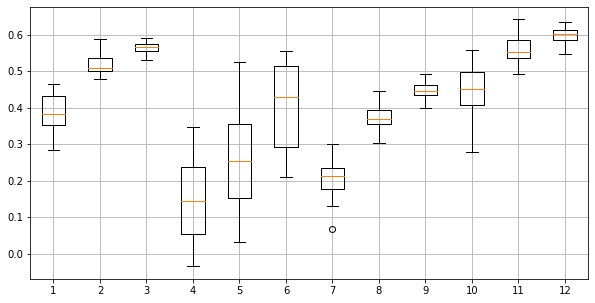

In [7]:
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
plt.boxplot([FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6])
plt.grid()


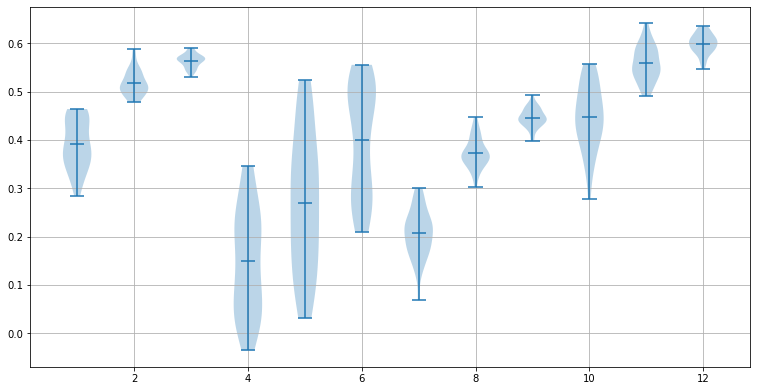

In [8]:
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
data_to_plot = [FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot,showmeans=True,showextrema=True,)
plt.grid()
plt.show()

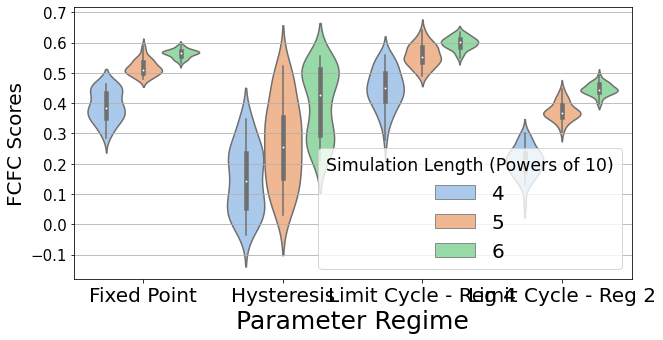

In [9]:
plt.grid()
ax = sns.violinplot(x="Regime", y="FCFC",hue="Sim Length", data=df,scale="width",palette=sns.color_palette("pastel"))

ind = np.arange(4)
plt.ylabel('FCFC Scores', fontsize=20)
#plt.title('Benchmarking against Literature', fontsize=20)
plt.xticks(ind, ('Fixed Point','Hysteresis','Limit Cycle - Reg 4', 'Limit Cycle - Reg 2'), fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Parameter Regime", fontsize=25)
plt.legend(title = "Simulation Length (Powers of 10)",loc=4, prop={'size': 20},title_fontsize='xx-large')


In [11]:
np.std(FixedPt_5)

0.02552488347693183

In [14]:
for i in [FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6]:
    print(np.std(i))

0.05025215623926126
0.02552488347693183
0.013731652411139623
0.10790637647836097
0.13823265586202238
0.11291647421529871
0.04854406985801267
0.030566482357376117
0.019550179574919314
0.0655180931124347
0.03609549176497805
0.02044391707207729


In [17]:
for i in [FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6]:
    print(stats.iqr(i)/2)

0.040670114038692945
0.017673098017136513
0.00903323993357924
0.09212497998105196
0.10128110096546931
0.10977455795573052
0.028689699043995598
0.01884260064643556
0.013623690085459245
0.045060176678578034
0.025098566343733253
0.013154243849422598


In [16]:
stats.iqr(i)

0.026308487698845195

(array([1., 3., 0., 5., 5., 5., 7., 9., 1., 5.]),
 array([0.54776341, 0.55649472, 0.56522603, 0.57395734, 0.58268865,
        0.59141996, 0.60015127, 0.60888258, 0.61761389, 0.6263452 ,
        0.63507651]),
 <a list of 10 Patch objects>)

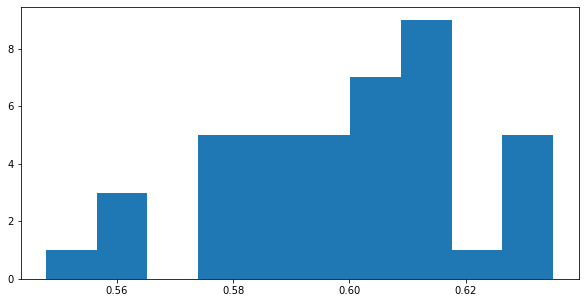

In [21]:
plt.hist(LCC_6)

In [4]:
SCorr_files = glob.glob(r"D:\Simulations\\2020_11_20\\" + "*Scorr*.csv") 

Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    #x = re.findall("2020_11_17.(.*)_i.*Length_e(.)",string)
    x = re.findall("2020_11_20.(.*)_i.*Length_e(.)",string)

    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df2 = pd.DataFrame(Params)
df2.columns = ['Regime','Sim Length']
df2["SCFC"] = SCFC
df2["FCFC"] = FCFC

In [10]:
Het_5 = df2.loc[df2['Sim Length'] == '5']["FCFC"]
Het_6 = df2.loc[df2['Sim Length'] == '6']["FCFC"]
for i in [Het_5,Het_6]:
    print(stats.iqr(i)/2)
    print(np.std(i))

0.023253481976751866
0.04920180034346629
0.012231011094737121
0.01599364055709333


In [5]:
# Just do a temporal average see wat we get. 

file = r"D:\Simulations\\2020_09_23\\LCycle_G[0.45]_b_e[0.8]_MouseCortex_Tseries_20200923-020223_.csv"
df = np.genfromtxt(file,delimiter="\t")

bold_time = df[0]
bold_data = df[1:]


In [30]:
# Reduces size by 1000 x 
AVERAGED_DATA = []
# Each node
for row in bold_data:
    ROW = []

    for i in np.arange(row.size/1000):
        # Average 1000:
        i = int(i)
        Mean = np.mean(row[0 + i*1000:1000*(i+1)])
        ROW.append(Mean)

    AVERAGED_DATA.append(ROW)

AVERAGED_DATA = pd.DataFrame(AVERAGED_DATA)
AVERAGED_DATA

In [47]:
# Rolling average of 1000. 
AVERAGED_DATA = []
# Each node
for row in bold_data:
    ROW = []

    for i in np.arange(row.size-1000):
        # Average 1000:
        i = int(i)
        Mean = np.mean(row[0 + i:1000 + i])
        ROW.append(Mean)

    AVERAGED_DATA.append(ROW)

AVERAGED_DATA = pd.DataFrame(AVERAGED_DATA)
AVERAGED_DATA

,0,1,2,3,4,5,6,7,8,9,...,117990,117991,117992,117993,117994,117995,117996,117997,117998,117999
0,0.490845,0.490816,0.490787,0.490760,0.490735,0.490719,0.490715,0.490715,0.490714,0.490711,...,0.489515,0.489532,0.489550,0.489569,0.489577,0.489586,0.489602,0.489611,0.489620,0.489624
1,0.474880,0.474876,0.474858,0.474838,0.474822,0.474805,0.474785,0.474772,0.474762,0.474753,...,0.474858,0.474862,0.474867,0.474873,0.474888,0.474903,0.474915,0.474927,0.474926,0.474928
2,0.301599,0.301595,0.301585,0.301569,0.301551,0.301533,0.301522,0.301505,0.301481,0.301463,...,0.313229,0.313236,0.313246,0.313260,0.313270,0.313265,0.313250,0.313223,0.313191,0.313163
3,0.241035,0.241295,0.241573,0.241866,0.242166,0.242461,0.242749,0.243038,0.243330,0.243626,...,0.246190,0.246199,0.246205,0.246204,0.246200,0.246200,0.246202,0.246203,0.246199,0.246190
4,0.301840,0.301861,0.301882,0.301909,0.301938,0.301974,0.302010,0.302040,0.302066,0.302095,...,0.305477,0.305612,0.305756,0.305902,0.306036,0.306165,0.306289,0.306416,0.306552,0.306707
5,0.306342,0.306164,0.305983,0.305805,0.305635,0.305466,0.305308,0.305142,0.304976,0.304805,...,0.301785,0.301760,0.301741,0.301724,0.301708,0.301687,0.301659,0.301628,0.301597,0.301571
6,0.331765,0.331400,0.331030,0.330652,0.330276,0.329888,0.329493,0.329095,0.328707,0.328321,...,0.353832,0.353821,0.353807,0.353793,0.353778,0.353760,0.353740,0.353721,0.353702,0.353677
7,0.488079,0.488083,0.488086,0.488080,0.488074,0.488076,0.488077,0.488075,0.488079,0.488081,...,0.483437,0.483448,0.483460,0.483465,0.483462,0.483456,0.483449,0.483440,0.483428,0.483428
8,0.440040,0.440011,0.439988,0.439974,0.439955,0.439928,0.439904,0.439886,0.439861,0.439840,...,0.444107,0.444132,0.444156,0.444179,0.444198,0.444221,0.444241,0.444262,0.444285,0.444311
9,0.383071,0.383170,0.383273,0.383365,0.383439,0.383517,0.383592,0.383657,0.383702,0.383738,...,0.386863,0.386950,0.387043,0.387146,0.387251,0.387355,0.387462,0.387574,0.387690,0.387801


In [48]:
FCM = np.corrcoef(AVERAGED_DATA)

# Set diagonals to NaN
FCM1 = FCM
np.fill_diagonal(FCM1,np.nan)

# Calculate FC-FC score for mouse 
# FCM_exp
FCM_exp = np.genfromtxt('FCM_MouseExperimental.csv',delimiter = "\t")
# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)

# Remove the ith row and column in FCM (i.e. the specified region)
FCM_exp = np.delete(FCM_exp,obj=[7],axis=0)
FCM_exp = np.delete(FCM_exp,obj=[7],axis=1)

# Comparing FC_experimental Vs FC_Simulation with Spearman Correlation

FCM_Exp_U = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]  
FCM_Upper = FCM[np.triu_indices(FCM.shape[0], k = 1)]

# FC-FC Spearman Correlation
FCFC = stats.spearmanr(a=FCM_Exp_U,b=FCM_Upper)
print(FCFC)

SpearmanrResult(correlation=0.3589852503132705, pvalue=1.0934337141402745e-21)


## J_e Bif Checking
For identifying the border between Region ii and iii

In [7]:
# For J_e Bif Checker

# Import df: 

df = pd.read_csv('do-not-track/J_e_LCycle_stats.csv')

df_pivot_min = df.pivot(index='B_e', columns='G', values='TheMin')
df_pivot_max = df.pivot(index='B_e', columns='G', values='TheMax')
df_pivot_median = df.pivot(index='B_e', columns='G', values='TheMedian')
df_pivot_mean = df.pivot(index='B_e', columns='G', values='TheMean')

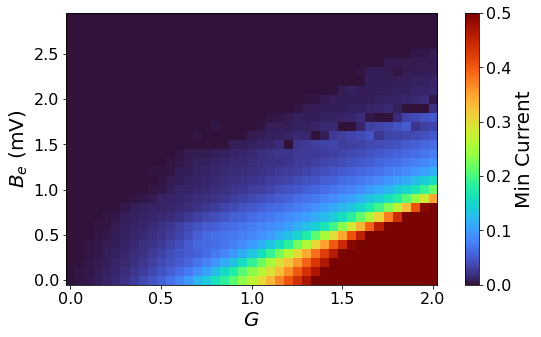

In [8]:
x = df_pivot_min.index[::5]
y = x.astype(np.float)
X = df_pivot_min.columns[::10]
Y = X.astype(np.float)

cs=plt.imshow(df_pivot_min, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none',origin='lower',vmin=0,vmax=0.5)
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Min Current', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.yticks(ticks=np.arange(len(df_pivot_min.index))[::5],labels=y,fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot_min.columns))[::10],labels=Y,fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
#plt.savefig("do-not-track\\" + Regime +"_sweep.pdf",bbox_inches='tight')
plt.show()

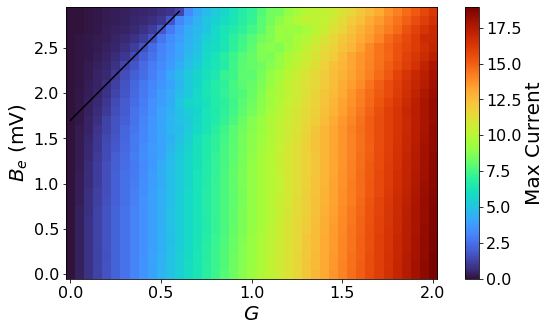

In [9]:
df_pivot = df_pivot_max
x = df_pivot.index[::5]
y = x.astype(np.float)
X = df_pivot.columns[::10]
Y = X.astype(np.float)

line_G = np.arange(start=0,stop=13,step=1)
line_Be = np.arange(start=17,stop=30,step=1)

cs=plt.imshow(df_pivot_max, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none',origin='lower',)
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Max Current', fontsize=20)
axcb.ax.tick_params(labelsize=16)

plt.plot(line_G,line_Be,color='k')

plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=y,fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::10],labels=Y,fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
#plt.savefig("do-not-track\\" + Regime +"_sweep.pdf",bbox_inches='tight')
plt.show()

In [10]:
df_pivot_max

G,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,1.55,1.60,1.65,1.70,1.75,1.80,1.85,1.90,1.95,2.00
B_e,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.407251,0.837924,1.275464,1.723658,2.180847,2.643735,3.111130,3.581624,4.053851,...,14.582671,15.066088,15.549712,16.033522,16.517494,17.001611,17.485854,17.970206,18.454653,18.939180
0.1,0.0,0.401837,0.831002,1.266895,1.709720,2.164400,2.625399,3.090535,3.559698,4.031807,...,14.550142,15.033257,15.516665,16.000335,16.484240,16.968354,17.452651,17.937111,18.421711,18.906433
0.2,0.0,0.401827,0.830489,1.265595,1.700772,2.146529,2.603648,3.065770,3.531832,4.002214,...,14.518186,15.000520,15.483270,15.966401,16.449879,16.933669,17.417739,17.902057,18.386595,18.871326
0.3,0.0,0.399166,0.835243,1.271997,1.709183,2.147193,2.595951,3.049254,3.505921,3.968183,...,14.489673,14.970588,15.452033,15.933997,16.416451,16.899365,17.382701,17.866421,18.350487,18.834862
0.4,0.0,0.394386,0.836015,1.283175,1.717847,2.156559,2.599670,3.056358,3.512807,3.963704,...,14.466784,14.946318,15.426160,15.906427,16.387194,16.868504,17.350367,17.832769,18.315684,18.799077
0.5,0.0,0.387893,0.832227,1.291387,1.734993,2.168705,2.608636,3.056234,3.516730,3.977029,...,14.444666,14.925108,15.405109,15.884836,16.364481,16.844245,17.324301,17.804789,18.285801,18.767387
0.6,0.0,0.381865,0.827479,1.285512,1.732117,2.170548,2.620600,3.063107,3.515342,3.977747,...,14.411308,14.895466,15.378734,15.861124,16.342685,16.823518,17.303779,17.783670,18.263423,18.743268
0.7,0.0,0.378791,0.808159,1.272432,1.704613,2.149731,2.599399,3.066703,3.510526,3.968641,...,14.356994,14.846389,15.334774,15.822088,16.308298,16.793392,17.277376,17.760283,18.242190,18.723226
0.8,0.0,0.350172,0.807744,1.256495,1.667868,2.128552,2.579016,3.022299,3.499432,3.950841,...,14.277855,14.771428,15.265144,15.758332,16.250583,16.741670,17.231478,17.719959,18.207098,18.692900


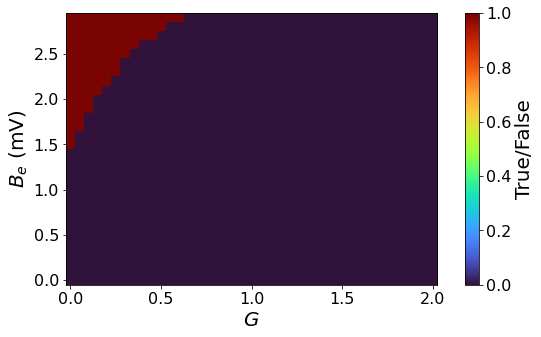

In [11]:
df = (df_pivot_max.sub(df_pivot_max.index,axis=0) < -1.45)
# ( (df_pivot_max.sub(df_pivot_max.index,axis=0) > -1.75)) & 
df_pivot = df_pivot_max
x = df_pivot.index[::5]
y = x.astype(np.float)
X = df_pivot.columns[::10]
Y = X.astype(np.float)

cs=plt.imshow(df, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none',origin='lower',)
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('True/False', fontsize=20)
axcb.ax.tick_params(labelsize=16)

plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=y,fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::10],labels=Y,fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
plt.savefig("do-not-track\\J_e_Border_Check.pdf",bbox_inches='tight')
plt.show()

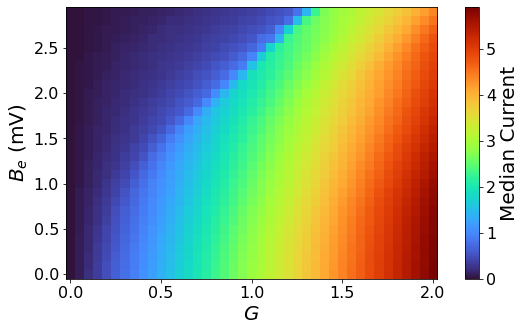

In [12]:
cs=plt.imshow(df_pivot_median, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none',origin='lower',)
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Median Current', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=y,fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::10],labels=Y,fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
#plt.savefig("do-not-track\\" + Regime +"_sweep.pdf",bbox_inches='tight')
plt.show()

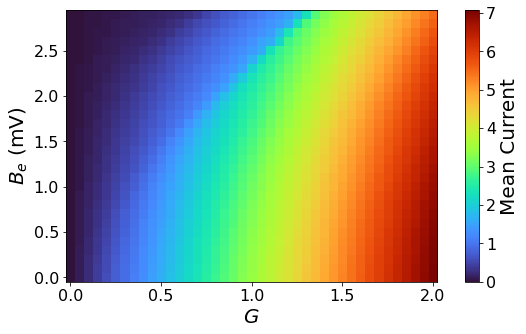

In [28]:
cs=plt.imshow(df_pivot_mean, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none',origin='lower',)
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Mean Current', fontsize=20)
axcb.ax.tick_params(labelsize=16)
#plt.yticks(ticks=np.arange(len(df_pivot_min.index))[::5],fontsize=16)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=y,fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::10],labels=Y,fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
#plt.savefig("do-not-track\\" + Regime +"_sweep.pdf",bbox_inches='tight')
plt.show()

[1.16532452e-01 2.01181244e-05 1.39106082e-01 3.17381186e-04]


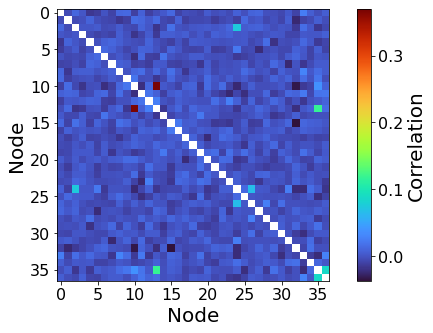

In [9]:
# Get FCMs

Regime = "LCycle"
G_value = 1.8
B_e_value = 0.5

File_start = r"D:\Simulations\2020_09_23\\"  + Regime + "_G[[]" + str(G_value) + "[]]_b_e[[]" + str(B_e_value) + "[]]"

# LCycle = 09_23
# Hysteresis = 10_06
#FixedPt = 10_05

ScorrFile = glob.glob(File_start + "*SCorr*_.csv")[0]
FCMFile = glob.glob(File_start + "*FCM*_.csv")[0]
ParamsFile = glob.glob(File_start + "*Params*_.csv")[0]

Scorra = np.genfromtxt(ScorrFile)
print(Scorra)

# Plot Simulated FCM
FCM_sim = np.genfromtxt(FCMFile,delimiter="\t")
index_fg = np.array([13,31,10,8,7,9,11,12,0,15,19,25,26,27,34,33,35,29,20,28,16,14,17,18,21,36,4,6,5,32,1,22,30,24,23,3,2])

# Re-order
FCM_sim = FCM_sim[index_fg] [:,index_fg]

# ListedColormap(turbo_colormap_data)
cs=plt.imshow(FCM_sim, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
#plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Node",fontsize=20)
plt.ylabel("Node",fontsize=20)
plt.savefig("do-not-track\\" + Regime + "_G_" + str(G_value) + "_B_e_" + str(B_e_value) + "_FCM.pdf",bbox_inches='tight',)
plt.savefig("do-not-track\\" + Regime + "_G_" + str(G_value) + "_B_e_" + str(B_e_value) + "_FCM.png",bbox_inches='tight',)
plt.show()

## Sigma Sweep

In [2]:
Regime = "LCycle"

SCorr_files = glob.glob(r"D:\Simulations\2021_01_25\\" + Regime +"*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2021_02_26\\" + Regime +"*Scorr*.csv")

Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    #x = re.findall("\[(.*)\]sig_e(...).*sig_i(...)",string)
    #x = re.findall("\[(.*)\]sig_e(.).*sig_i(...)",string)
    x = re.findall("G\[(.*)\]_b_e.*sig_e(...).*sig_i(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G','sig_e', 'sig_i']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

df_pivot = df.sort_values('FCFC').drop_duplicates(['sig_e','sig_i'],keep='last').pivot(index='sig_e', columns='sig_i', values='FCFC')
df_pivot = df_pivot.sort_values('sig_e',ascending=True)
print(df_pivot)
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

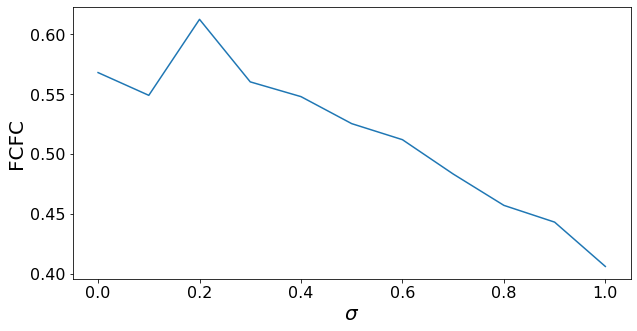

In [3]:
array = np.diag(df_pivot)
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],array)
plt.xlabel("$\sigma$",fontsize=20)
plt.ylabel("FCFC",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("do-not-track\\Het_sigma_1_sweep.pdf",bbox_inches='tight')

In [9]:
df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values

E_pop = np.delete(E_pop,[26,19,3])
I_pop = np.delete(I_pop,[26,19,3])
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7,26,19,3) -0.27 -> 0.41
E_normalised = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7,26,19,3) -0.4 -> 0.63
I_normalised = (I_pop-I_mean)/I_mean

In [12]:
Regime = "LCycle_HetV3"

#SCorr_files = glob.glob(r"D:\Simulations\2021_01_25\\" + Regime +"*Scorr*.csv")
SCorr_files = glob.glob(r"D:\Simulations\2021_02_26\\*Scorr*.csv")

Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    #x = re.findall("\[(.*)\]sig_e(...).*sig_i(...)",string)
    #x = re.findall("\[(.*)\]sig_e(.).*sig_i(...)",string)
    x = re.findall("LCycle(.*)_G\[(.*)\]_b_e.*sig_e(...).*sig_i(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['Regime','G','sig_e', 'sig_i']
df["SCFC"] = SCFC
df["FCFC"] = FCFC



In [13]:
df

,Regime,G,sig_e,sig_i,SCFC,FCFC
0,Alt_Het_Removed,0.75,0.0,0.0,0.452152,0.509231
1,Alt_Het_Removed,0.75,0.1,0.1,0.455044,0.537102
2,Alt_Het_Removed,0.75,0.2,0.2,0.422313,0.527201
3,Alt_Het_Removed,0.75,0.3,0.3,0.400706,0.499487
4,Alt_Het_Removed,0.75,0.4,0.4,0.368905,0.462052
5,Alt_Het_Removed,0.75,0.5,0.5,0.350060,0.454454
6,Alt_Het_Removed,0.75,0.6,0.6,0.339375,0.413840
7,Alt_Het_Removed,0.75,0.7,0.7,0.308420,0.393543
8,Alt_Het_Removed,0.75,0.8,0.8,0.316526,0.392495
9,Alt_Het_Removed,0.75,0.9,0.9,0.283642,0.384739


In [16]:
df_pivot = df.pivot(index='sig_i', columns='Regime', values='FCFC')
print(df_pivot)
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

Regime  Alt_Het_Removed  B_Het_Removed    _HetV2    _HetV3
sig_i                                                     
0.0            0.509231       0.605841  0.535524  0.535524
0.1            0.537102       0.611659  0.569302  0.592715
0.2            0.527201       0.578056  0.597267  0.611197
0.3            0.499487       0.522563  0.529718  0.568192
0.4            0.462052       0.501476  0.493771  0.548108
0.5            0.454454       0.453879  0.454228  0.543953
0.6            0.413840       0.464119  0.393046  0.518471
0.7            0.393543       0.434345  0.354205  0.496190
0.8            0.392495       0.376317  0.282527  0.488440
0.9            0.384739       0.346541  0.290790  0.478804
1.0            0.340745       0.348509  0.309680  0.472084


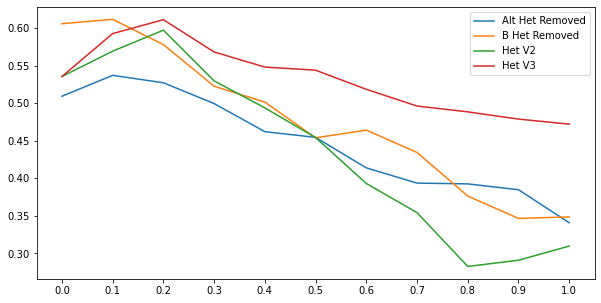

In [19]:
plt.plot(df_pivot)
plt.legend(('Alt Het Removed','B Het Removed','Het V2','Het V3'))

##  Identifying Critical Points in Het Case

In [5]:
# Define the Wilson Cowan Equations

def sig(v):
    # Sigmoid function
    return 1/(1 + np.exp(-v))

# Fixed pt - J_i=0,b_e=3,b_i=3.7,a_e=1,a_i=1,w_ee=12,w_ei=15,w_ie=10,w_ii=8,
# LCycle - J_i=0,b_e=2,b_i=2.8,a_e=1,a_i=1,w_ee=11,w_ei=10,w_ie=10,w_ii=1,
# LCycleH - J_i=0,b_e=3,b_i=4,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=15,w_ii=3,

def func(z,t,J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,_tau_i):
    # Initialise the function array.
    f = np.zeros(2)

    E = z[0]
    I = z[1]

    # Wilson Cowan Equations setting derivative = 0 
    f[0] = (-E + (1 - E)*sig(a_e*(w_ee*E - w_ei*I - b_e + J_e)))/tau_e
    f[1] = (-I + (1 - I)*sig(a_i*(w_ie*E - w_ii*I - b_i + J_i)))/tau_i

    return f

In [6]:
h_c_ee = np.fromstring("11.14799794 10.39054527 10.99995073 10.7799896  10.59026485 10.65829007 10.59197152 10.9799298  10.7706965  10.44587736 10.52463601 11.37952596  10.5086166  10.98251696 11.3933426  11.13850692 11.23532824 10.96687459 11.37414929 12.18638905 11.49092802 10.86727987 10.57059861 10.76835704 10.73324928 11.08686034 11.32023041 11.1347711  11.50488189 11.14964262 10.79733952 10.45870114 10.37042949 11.75960984 11.44570641 11.83789755 10.658117", dtype=float, sep=" ")

h_c_ei = np.fromstring("9.60574234  9.96235553 10.72885439 11.38835088  9.52194115 10.29199435 9.38113738  9.12243791  9.16156425  9.2075798   9.2901189   9.61767677   9.0910805   9.34630171  9.99703063  9.84167024  9.44810341  9.13810887   9.97600759 12.87632019  9.86990012  9.59657777  9.88821828 10.95144449  10.66472672 10.63257872 11.99191439 10.20027733 10.75132571 10.18097831  10.61728726  9.40211826 10.04810382  9.65252972  9.49666513  9.77250279  9.28847438", dtype=float, sep=" ")

h_c_ie = np.fromstring("10.13454359  9.44595024  9.99995521  9.79999055  9.6275135   9.68935461   9.62906502  9.98175436  9.79154227  9.49625214  9.56785091 10.3450236   9.55328782  9.98410633 10.35758419 10.12591538 10.21393476  9.96988599  10.34013572 11.0785355  10.4462982   9.87934533  9.6096351   9.78941549   9.75749934 10.07896395 10.29111856 10.12251918 10.45898354 10.13603875   9.8157632   9.50791012  9.42766317 10.6905544  10.40518765 10.76172505   9.68919727", dtype=float, sep=" ")

h_c_ii = np.fromstring("0.96057423 0.99623555 1.07288544 1.13883509 0.95219411 1.02919944  0.93811374 0.91224379 0.91615642 0.92075798 0.92901189 0.96176768 0.90910805 0.93463017 0.99970306 0.98416702 0.94481034 0.91381089  0.99760076 1.28763202 0.98699001 0.95965778 0.98882183 1.09514445 1.06647267 1.06325787 1.19919144 1.02002773 1.07513257 1.01809783  1.06172873 0.94021183 1.00481038 0.96525297 0.94966651 0.97725028 0.92884744", dtype=float, sep=" ")

index_fg = np.array([13,31,10,8,7,9,11,12,0,15,19,25,26,27,34,33,35,29,20,28,16,14,17,18,21,36,4,6,5,32,1,22,30,24,23,3,2])
# Need to re-order this hard-code for coupling parameters 
# Need to fix df_Je:
#df_Je = df_Je[index_fg]
h_c_ee = h_c_ee[index_fg]
h_c_ei = h_c_ei[index_fg]
h_c_ie = h_c_ie[index_fg]
h_c_ii = h_c_ii[index_fg]

In [7]:
AllRuns_max = []
AllRuns_min = []

for i in np.arange(len(h_c_ee)):
    The_max = []
    The_min = []

    # Parameters
    w_ee=h_c_ee[i]
    w_ei=h_c_ei[i]
    w_ie=h_c_ie[i]
    w_ii=h_c_ii[i]
    b_e=3
    b_i=2.8
    tau_e=10
    tau_i=65
    a_e=1
    a_i=1
    #J_e=3.5
    J_i=0

    # Integrator Settings
    length = 10000 
    dt = 0.1
    t = np.arange(0, length, dt)
    J = np.arange(0,6.5,0.025)

    for J_e in J:
        # Solve it! Note that the additional "args" supplied to "odeint" must be in a tuple; "(a,)".
        solut = odeint(func, [0.5, 0.5], t, args=(J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,tau_i) )

        # Obtain the max and min of the last 1/10 (tenth) elements
        eqbm_max = max(solut[-int(length/dt/10):,0])
        eqbm_min = min(solut[-int(length/dt/10):,0])

        The_max.append(eqbm_max)
        The_min.append(eqbm_min)

    AllRuns_max.append(The_max)
    AllRuns_min.append(The_min)

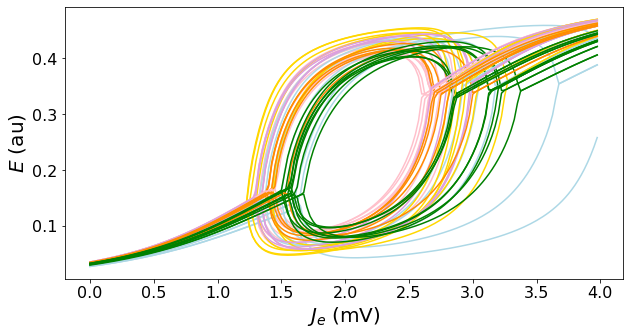

In [9]:
colour_list = ('pink','pink','pink','pink','pink','pink','pink','pink','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','gold','gold','gold','gold','gold','gold','plum','plum','plum','plum','darkorange','darkorange','darkorange','darkorange','darkorange','green','green','green','green','green','green','green','green')

for i in np.arange(len(h_c_ee)):
    plt.plot(J[0:160],AllRuns_max[i][0:160],color=colour_list[i],label='_nolegend_')   

for i in np.arange(len(h_c_ee)):
     plt.plot(J[0:160],AllRuns_min[i][0:160],color=colour_list[i],label='_nolegend_')

#plt.plot(J[0:160],Homog_max[0:160],color='k')
#plt.plot(J,AllRuns_max[12],color='g') 
#plt.plot(J,AllRuns_max[19],color='r')   
#plt.plot(J,AllRuns_min[36],color='lightcoral',)

# Get min-max external currents & plot on the diagram
# Region 12
#plt.plot((df_Je.min(axis=0)[12],df_Je.max(axis=0)[12]),np.zeros(2)+0.01,'g-o')
#plt.text(df_Je.min(axis=0)[12],0.02,"12 - SSp-ul",fontsize=14)
# Region 19 
#plt.plot((df_Je.min(axis=0)[19],df_Je.max(axis=0)[19]),np.zeros(2)+0.02,'r-o')

#plt.plot(J[0:160],Homog_min[0:160],color='k')  
#plt.plot(J,AllRuns_min[12],color='g')
#plt.plot(J,AllRuns_min[19],color='r')

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au)", fontsize=20)
#plt.title("Bifurcation Diagram - $E$ against $J_e$", fontsize=20)
#plt.legend(("Homogeneous","Het Node 12","Het Node 19", "Het Other Nodes","Node 12 $J_e$ Range","Node 19 $J_e$ Range"),loc="lower right",fontsize="x-large")
#plt.legend(("Homogeneous","Heterogeneous Regions"),loc="lower right",fontsize="x-large")
plt.xticks(fontsize=16, )
plt.yticks(fontsize=16, )
#plt.savefig("do-not-track\\Het_Bifurcation_FuncColoured.pdf",bbox_inches='tight')
plt.show()


In [59]:
# Create an array of all the Critical Points. 

Array = []
Crit_J_e = []

for j in np.arange(len(h_c_ee)):
    Result = np.array(AllRuns_max[j]) - np.array(AllRuns_min[j]) < 1e-6
    for i in np.arange(len(Result)):
        if Result[i] != Result[i-1]:
            Crit_J_e.append(J[i]-1.5)
            Crit_J_e.append(AllRuns_max[j][i])
    Array.append(Crit_J_e)
    Crit_J_e = []

In [60]:
Array

[[-0.19999999999999996,
  0.1496186120150049,
  1.3000000000000003,
  0.3551550486488521],
 [-0.07499999999999996, 0.1632224254713268, 1.25, 0.34005056810309964],
 [-0.09999999999999987,
  0.16234741574237496,
  1.2000000000000002,
  0.3385680218834415],
 [-0.17499999999999982, 0.15574440745759677, 1.225, 0.35057308214586697],
 [-0.22499999999999987, 0.15060258186671818, 1.225, 0.3554392715501107],
 [-0.09999999999999987,
  0.1637303045979266,
  1.2000000000000002,
  0.34147460358003623],
 [-0.22499999999999987,
  0.1427692091484719,
  1.4000000000000004,
  0.3618955261268115],
 [-0.125, 0.16295341636012475, 1.1750000000000003, 0.34375796583189827],
 [-0.19999999999999996,
  0.1453906077947012,
  1.4000000000000004,
  0.358925696986261],
 [-0.1499999999999999, 0.14739898014032787, 1.475, 0.35773919194689563],
 [0.050000000000000044, 0.12619448330011923, 2.625, 0.3758987696014678],
 [-0.04999999999999982, 0.14594185768482748, 1.725, 0.3543915282198417],
 [0.10000000000000009, 0.14219436

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

features = Array

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [65]:
kmeans = KMeans(init="random",n_clusters=6,n_init=10, max_iter=300, random_state=88)

In [66]:
kmeans.fit(scaled_features)
ari_kmeans = adjusted_rand_score(colour_list, kmeans.labels_)
print(ari_kmeans)

0.1918100449844641


In [67]:
kmeans.fit(features)
ari_kmeans = adjusted_rand_score(colour_list, kmeans.labels_)
print(ari_kmeans)
#acc_score = accuracy_score(ground_truth, kmeans.labels_)
#print(acc_score)
c_score = completeness_score(colour_list, kmeans.labels_)
print(c_score)

0.23274414930384119
0.4771991490516391


In [69]:
for i in np.arange(50):

    kmeans = KMeans(init="random",n_clusters=6,n_init=10, max_iter=300, random_state=i*12+1)
    kmeans.fit(features)
    ari_kmeans = adjusted_rand_score(colour_list, kmeans.labels_)
    print(ari_kmeans)
    c_score = completeness_score(colour_list, kmeans.labels_)
    print(c_score)

0.23274414930384119
0.4771991490516392
0.2793263363436661
0.4982003144785196
0.2954600513590775
0.5096065443137804
0.2793263363436661
0.4982003144785196
0.2793263363436661
0.49820031447851953
0.23274414930384119
0.4771991490516391
0.23274414930384119
0.4771991490516392
0.23274414930384119
0.47719914905163924
0.23274414930384119
0.4771991490516392
0.2793263363436661
0.4982003144785196
0.22961536739354318
0.4850588103871402
0.2793263363436661
0.4982003144785195
0.23274414930384119
0.4771991490516392
0.22514034659506957
0.47196021048423925
0.23274414930384119
0.47719914905163924
0.23274414930384119
0.4771991490516392
0.2793263363436661
0.4982003144785196
0.2793263363436661
0.49820031447851953
0.23274414930384119
0.4771991490516391
0.2793263363436661
0.4982003144785196
0.2793263363436661
0.4982003144785196
0.23274414930384119
0.4771991490516391
0.2848723967437447
0.4966607148725973
0.20776350324630471
0.41566587697918495
0.20776350324630471
0.4156658769791849
0.2793263363436661
0.498200314

In [ ]:
Regime = "LCycle"

SCorr_files = glob.glob(r"D:\Simulations\2021_01_25\\" + Regime +"*Scorr*.csv")

## Reviewer Comments

In [3]:
# Adding Error Bars

# Import the Het 

Regime = "LCycle"

SCorr_files = glob.glob(r"D:\Simulations\2021_01_25\\" + Regime +"*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2021_02_26\\" + Regime +"*Scorr*.csv")

Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    #x = re.findall("\[(.*)\]sig_e(...).*sig_i(...)",string)
    #x = re.findall("\[(.*)\]sig_e(.).*sig_i(...)",string)
    x = re.findall("G\[(.*)\]_b_e.*sig_e(...).*sig_i(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G','sig_e', 'sig_i']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

df_pivot = df.sort_values('FCFC').drop_duplicates(['sig_e','sig_i'],keep='last').pivot(index='sig_e', columns='sig_i', values='FCFC')
df_pivot = df_pivot.sort_values('sig_e',ascending=True)
print(df_pivot)
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

sig_i       0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
sig_e                                                                         
0.0    0.553166  0.574826  0.608470  0.614553  0.594669  0.577255  0.554006   
0.1    0.479544  0.534164  0.616865  0.617111  0.603246  0.568618  0.536967   
0.2    0.489754  0.494784  0.597640  0.608924  0.580499  0.532841  0.513998   
0.3    0.450285  0.515835  0.564123  0.545415  0.513797  0.527100  0.511459   
0.4    0.538005  0.486950  0.555210  0.537009  0.533089  0.539379  0.518165   
0.5    0.600312  0.615923  0.568854  0.576339  0.505975  0.510516  0.505606   
0.6    0.575140  0.554795  0.495864  0.539626  0.517384  0.494321  0.497123   
0.7    0.597852  0.543138  0.545919  0.520653  0.561665  0.487147  0.467120   
0.8    0.542234  0.511741  0.533730  0.542562  0.523727  0.494838  0.454436   
0.9    0.487272  0.520464  0.434288  0.460072  0.518723  0.527741  0.498487   
1.0    0.484007  0.531953  0.472473  0.453323  0.497

(array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65]),
 <a list of 7 Text major ticklabel objects>)

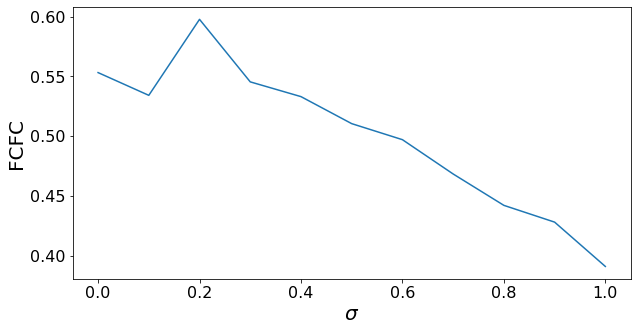

In [4]:
array = np.diag(df_pivot)
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],array)
plt.xlabel("$\sigma$",fontsize=20)
plt.ylabel("FCFC",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.savefig("do-not-track\\Het_sigma_1_sweep.pdf",bbox_inches='tight')

In [30]:
# Now to add the error bars from shuffle... 

#Shuffle_files = glob.glob(r"D:\Simulations\2021_01_06\\*20210106-181655*")
# Scorr contains the S Correlation
Shuffle_Scorr = glob.glob(r"D:\Simulations\2021_01_06\\*Scorr*")
# Params contains the Sigma values
#Shuffle_Params = glob.glob(r"D:\Simulations\2021_01_06\\*")

In [67]:
print(len(Shuffle_Params))
print(len(Shuffle_Scorr))

Scorr = np.genfromtxt(string)
print(Scorr)

1946
584
[3.17786029e-01 1.22745332e-32 3.91216727e-01 8.77867643e-26]


In [76]:
# Let's just do this in a loop. 
FCFC = []
SIGMA = [] 

for file in Shuffle_Scorr:

    # First, save the Scorr
    Scorr = np.genfromtxt(file)[2]

    # Next, take the string of random numbers which uniquely identifies the run. 
    x = re.findall("Scorr_(.*)_.csv",file)

    # Find the params file which corresponds.
    Param_file = glob.glob(r"D:\Simulations\2021_01_06\\*Params_"+ x[0] + "*.csv")   

    if Param_file != []:   
        # Load it into a Dict.
        dict_from_csv = pd.read_csv(Param_file[0], header=None, index_col=0, squeeze=True).to_dict()

        # Take the sigma file out
        sigma = dict_from_csv["Sigma_e"]
        # And append it.
        SIGMA.append(sigma)

        # Append FCFC if no errors.
        FCFC.append(Scorr)

    else: 
        print(x)
        # 6 erroneous ones out of ~584, we'll let it go.


df = pd.DataFrame()
df['sigma'] = SIGMA
df['FCFC'] = FCFC

df


['20210106-180821']
['20210106-181445']
['20210106-181453']
['20210106-181506']
['20210106-181514']
['20210106-182415']


,sigma,FCFC
0,0.0,0.553166
1,0.0,0.553166
2,0.0,0.553166
3,0.0,0.553166
4,0.0,0.553166
...,...,...
573,0.6000000000000001,0.483444
574,0.8,0.504733
575,0.8,0.417013
576,1.0,0.358622


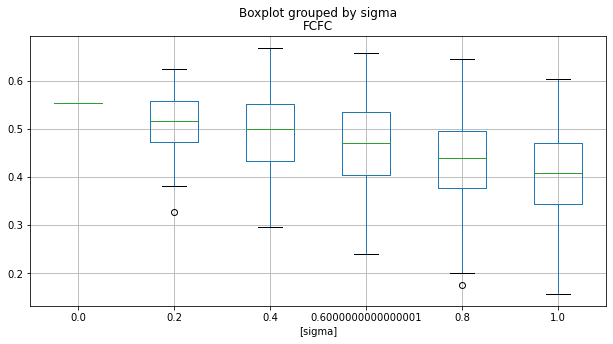

In [77]:
df = pd.DataFrame()
df['sigma'] = SIGMA
df['FCFC'] = FCFC

df

df.boxplot(by='sigma')

# This was for the shuffle test, so this represents the ranges of how applying a gradient can affect the results.

In [129]:
df_max = df.groupby('sigma').max()
df_min = df.groupby('sigma').min()

# Error bar above. 
yerr_1 = df_max['FCFC'] - array
# Error bar below
yerr_2 = array - df_min['FCFC']

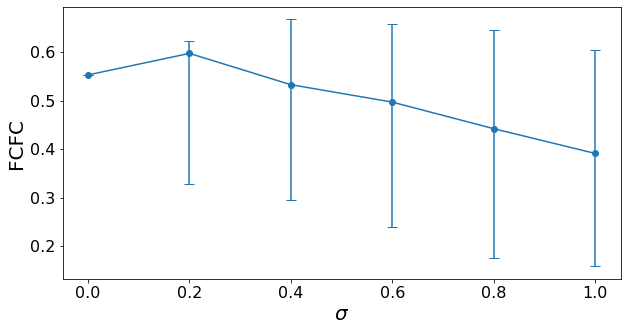

In [130]:
# Need to plot 1 , 3 ,5 ... as didn't generate shuffle error bars for 0.1, 0.3, etc.
# Honestly, these aren't error bars per say, more like "shuffle ranges" 
array = np.diag(df_pivot)
array = array[0:11:2]

plt.errorbar([0,0.2,0.4,0.6,0.8,1.0],array,yerr=(yerr_2,yerr_1),fmt='-o',capsize=5)
plt.xlabel("$\sigma$",fontsize=20)
plt.ylabel("FCFC",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("do-not-track\\Het_sweep_reviewer1.pdf",bbox_inches='tight')

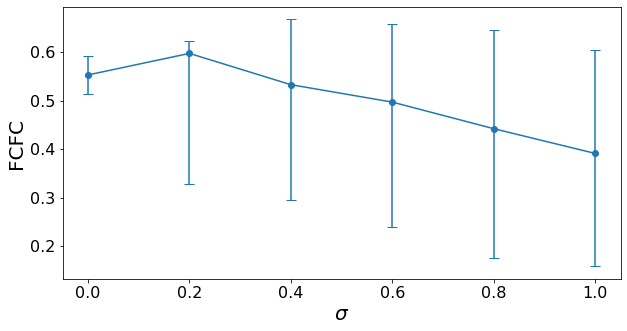

In [131]:
# Version where we have error bars for sigma = 0
# Based on Random seed.  (so the "error bars" are different)

yerr_2[0] = 0.04
yerr_1[0] = 0.04

plt.errorbar([0,0.2,0.4,0.6,0.8,1.0],array,yerr=(yerr_2,yerr_1),fmt='-o',capsize=5)
plt.xlabel("$\sigma$",fontsize=20)
plt.ylabel("FCFC",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("do-not-track\\Het_sweep_reviewer2.pdf",bbox_inches='tight')

In [7]:
# Calculating FCFC within brain regions. 

# Index required to re-arrange FCMs
index_fg = np.array([13,31,10,8,7,9,11,12,0,15,19,25,26,27,34,33,35,29,20,28,16,14,17,18,21,36,4,6,5,32,1,22,30,24,23,3,2])

# Get FCM for Het

Regime = "LCycle"
G_value = 0.7
sig_e = 0.2
sig_i = 0.2
B_e_value = 1.5

File_start = r"D:\Simulations\\2021_01_25\\" + Regime +"*_G[[]" + str(G_value) + "[]]*sig_e" + str(sig_e) + "_sig_i" + str(sig_i) # 1st Het Gradient - LCycleCutOld - 1.2e5

TseriesFile = glob.glob(File_start+"*Tseries*_.csv")[0]
ScorrFile = glob.glob(File_start + "*SCorr*_.csv")[0]
FCMFile = glob.glob(File_start + "*FCM*_.csv")[0]
ParamsFile = glob.glob(File_start + "*Params*_.csv")[0]

# Plot Simulated FCM
FCM_sim = np.genfromtxt(FCMFile,delimiter="\t")
# Re-order
FCM_sim = FCM_sim[index_fg] [:,index_fg]

FCM_het = FCM_sim

In [18]:
# Get FCM for Homog

File_start = r"D:\Simulations\\2020_09_23\\" + Regime +"*_G[[]" + str(G_value) 

TseriesFile = glob.glob(File_start+"*Tseries*_.csv")[0]
ScorrFile = glob.glob(File_start + "*SCorr*_.csv")[0]
FCMFile = glob.glob(File_start + "*FCM*_.csv")[0]
ParamsFile = glob.glob(File_start + "*Params*_.csv")[0]

# Plot Simulated FCM
FCM_sim = np.genfromtxt(FCMFile,delimiter="\t")
# Re-order
FCM_sim = FCM_sim[index_fg] [:,index_fg]

FCM_homog = FCM_sim

In [13]:
# Get Experimental FCM

ParamsDict = {}
ParamsDict["REMOVE"] = 7

FCM_exp = np.genfromtxt('FCM_MouseExperimental.csv',delimiter = "\t")
# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)

# Remove the ith row and column in FCM (i.e. the specified region)
FCM_exp = np.delete(FCM_exp,obj=ParamsDict["REMOVE"],axis=0)
FCM_exp = np.delete(FCM_exp,obj=ParamsDict["REMOVE"],axis=1)

#Re_order
FCM_exp = FCM_exp[index_fg] [:,index_fg]

FCM_Exp_U = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)

In [15]:
len(FCM_exp)

37

In [19]:
FCM_homog

array([[        nan,  0.70030063,  0.54312365, ...,  0.01878595,
        -0.04192179, -0.03797617],
       [ 0.70030063,         nan,  0.57441123, ..., -0.03554882,
        -0.05739745, -0.0794574 ],
       [ 0.54312365,  0.57441123,         nan, ..., -0.0286076 ,
        -0.04794325, -0.09867522],
       ...,
       [ 0.01878595, -0.03554882, -0.0286076 , ...,         nan,
         0.48484723,  0.73493859],
       [-0.04192179, -0.05739745, -0.04794325, ...,  0.48484723,
                nan,  0.5001709 ],
       [-0.03797617, -0.0794574 , -0.09867522, ...,  0.73493859,
         0.5001709 ,         nan]])

In [43]:
# Compare somatomotor FCFC

index_somato = np.arange(0,8)
index_medial = np.arange(8,14)
index_temporal = np.arange(14,20)
index_visual = np.arange(20,24)
index_antero = np.arange(24,29)
index_prefrontal = np.arange(29,37)

index_list = [index_somato,index_medial,index_temporal,index_visual,index_antero,index_prefrontal ]

In [39]:
index = index_somato
FCM_homog_a = FCM_homog[index] [:,index]
FCM_het_a = FCM_het[index] [:,index]
FCM_exp_a = FCM_exp[index] [:,index]

FCM_sim = FCM_het_a

FCM_Exp_U = FCM_exp_a[np.triu_indices(FCM_exp_a.shape[0], k = 1)]
FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)

print("Het")
print(SCorr)

FCM_sim = FCM_homog_a
FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)

print("Homog")
print(SCorr)

Het
SpearmanrResult(correlation=0.8762999452654625, pvalue=9.926292693367841e-10)
Homog
SpearmanrResult(correlation=0.8445539135194308, pvalue=1.602268182315338e-08)


In [63]:
homog = []
het = []

for index in index_list:

    FCM_homog_a = FCM_homog[index] [:,index]
    FCM_het_a = FCM_het[index] [:,index]
    FCM_exp_a = FCM_exp[index] [:,index]

    FCM_sim = FCM_het_a

    FCM_Exp_U = FCM_exp_a[np.triu_indices(FCM_exp_a.shape[0], k = 1)]
    FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

    # Spearman Correlation
    SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)
    het.append(SCorr[0])

    print("Het")
    print(SCorr)

    FCM_sim = FCM_homog_a
    FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

    # Spearman Correlation
    SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)
    homog.append(SCorr[0])

    print("Homog")
    print(SCorr)

Het
SpearmanrResult(correlation=0.8762999452654625, pvalue=9.926292693367841e-10)
Homog
SpearmanrResult(correlation=0.8445539135194308, pvalue=1.602268182315338e-08)
Het
SpearmanrResult(correlation=0.3321428571428571, pvalue=0.2264717590707243)
Homog
SpearmanrResult(correlation=0.3571428571428571, pvalue=0.19127476343157904)
Het
SpearmanrResult(correlation=0.007142857142857141, pvalue=0.9798442277615982)
Homog
SpearmanrResult(correlation=-0.05357142857142857, pvalue=0.8496099367776071)
Het
SpearmanrResult(correlation=0.4285714285714286, pvalue=0.3965014577259474)
Homog
SpearmanrResult(correlation=0.08571428571428573, pvalue=0.8717434402332361)
Het
SpearmanrResult(correlation=0.2727272727272727, pvalue=0.44583834154275137)
Homog
SpearmanrResult(correlation=0.29696969696969694, pvalue=0.4047016712701569)
Het
SpearmanrResult(correlation=-0.00875752599890531, pvalue=0.964722315510463)
Homog
SpearmanrResult(correlation=0.01751505199781062, pvalue=0.9295095031118134)


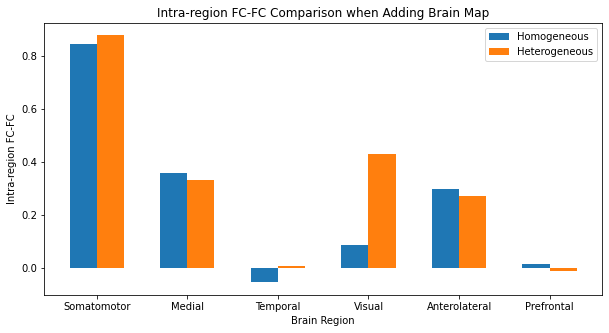

In [64]:
width=0.3
ind = np.arange(len(index_list))

plt.bar(ind,homog,width,label='Homogeneous')
plt.bar(ind+width,het,width,label='Heterogeneous')
#xticks
plt.xticks(ind + width / 2, ('Somatomotor', 'Medial', 'Temporal','Visual','Anterolateral','Prefrontal'))
plt.ylabel('Intra-region FC-FC')
plt.xlabel('Brain Region')
plt.title('Intra-region FC-FC Comparison when Adding Brain Map')

plt.legend()

plt.savefig("do-not-track\\intraregion_review.pdf",bbox_inches='tight')